In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.ConvNet.ConvNet import *
from NN_library.ConvNet.train_ConvNet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda


In [2]:
data = dataset_nonuniform()
loaders = get_loaders(data, 16)

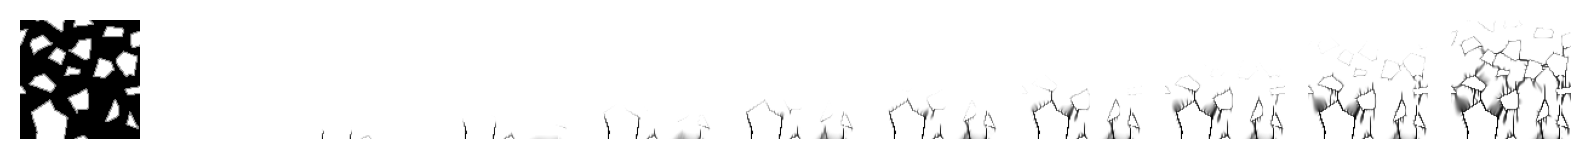

In [3]:
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys')
    axs.flat[i].set_axis_off()

In [4]:
name = 'NN_library/ConvNet/ConvNet'
args = {'lr' : 0.000001, 'epochs' : 50, 'dev' : dev, 'name' : name}

In [5]:
net = ConvNet(16)

In [6]:
torch.cuda.empty_cache() 

In [7]:
net = load_network(net, args['name']+'_49', args)

In [8]:
losses_train, losses_val = train(net, loaders, args)

Epoch: 0 batch: 0 mean train loss:  3.3181868037
Epoch: 0 batch: 100 mean train loss:  4.4801453615
Epoch: 0 batch: 200 mean train loss:  3.8219889211
Epoch: 0 batch: 300 mean train loss:  3.0445098921
Epoch: 0 batch: 400 mean train loss:  4.0424175428
Epoch: 0 batch: 500 mean train loss:  3.5937900674
Epoch: 0 batch: 600 mean train loss:  3.9340049725
Epoch: 0 batch: 700 mean train loss:  3.9511343162
Epoch: 0 mean train loss:  3.8977771379 mean val. rec. loss:  4.7177462578
Epoch: 1 batch: 0 mean train loss:  3.7725926042
Epoch: 1 batch: 100 mean train loss:  3.8368498259
Epoch: 1 batch: 200 mean train loss:  3.3688518875
Epoch: 1 batch: 300 mean train loss:  4.3773819762
Epoch: 1 batch: 400 mean train loss:  2.7403363776
Epoch: 1 batch: 500 mean train loss:  4.2225009743
Epoch: 1 batch: 600 mean train loss:  4.4520166100
Epoch: 1 batch: 700 mean train loss:  3.7794194894
Epoch: 1 mean train loss:  3.8752380419 mean val. rec. loss:  3.8118391037
Epoch: 2 batch: 0 mean train loss:  3.

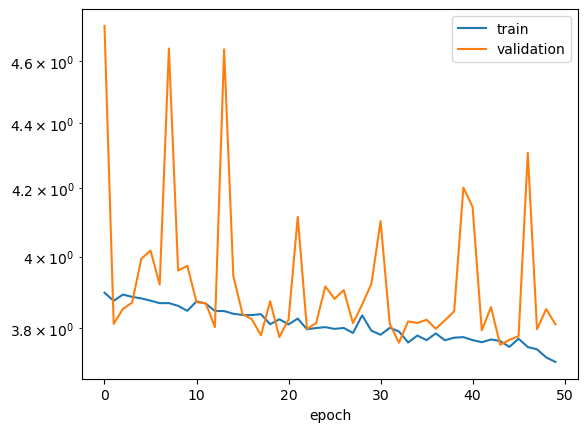

In [10]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.yscale('log')